# Проект по SQL
Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Описание данных

Таблица books
содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

Таблица authors
содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

Таблица publishers
содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

Таблица ratings
содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

Таблица reviews
содержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

Схема данных
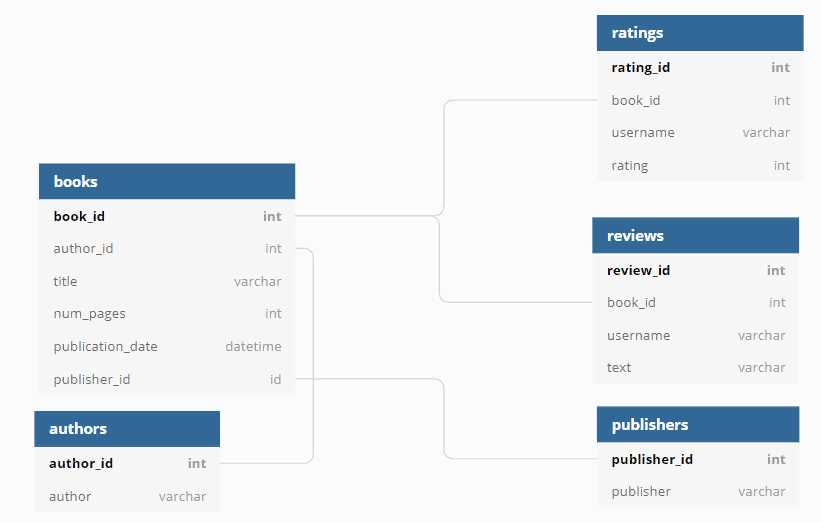

## Исследуем таблицы

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM books
            LIMIT 5
        '''

In [3]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM authors
            LIMIT 5
        '''

In [5]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM ratings
            LIMIT 5
        '''

In [7]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM reviews
            LIMIT 5
        '''

In [9]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [10]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM publishers
            LIMIT 5
        '''

In [11]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### Вывод:
- Все датасеты загружаются нормально, наполнение соответствует заявленному.

## Посчитайте, сколько книг вышло после 1 января 2000 года

In [12]:
# Формируем sql-запрос
query = ''' SELECT *
            FROM books
            WHERE (publication_date :: date) > '2000-01-01';
        '''

In [13]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
814,994,408,World War Z: An Oral History of the Zombie War,342,2006-09-12,68
815,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
816,998,201,Year of Wonders,358,2002-04-30,212
817,999,94,You Suck (A Love Story #2),328,2007-01-16,331


### Вывод:
- После 1 января 2000 года вышло 819 книг.

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [14]:
# Формируем sql-запрос.
query = ''' SELECT 
            books.book_id,
            COUNT(DISTINCT review_id) as review_id,
            AVG(DISTINCT rating) as rating
            FROM books
            LEFT JOIN ratings ON ratings.book_id = books.book_id
            LEFT JOIN reviews ON reviews.book_id = books.book_id
            GROUP BY books.book_id
        '''

In [15]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,book_id,review_id,rating
0,1,2,3.666667
1,2,1,2.500000
2,3,3,4.500000
3,4,2,4.500000
4,5,4,4.000000
...,...,...,...
995,996,3,4.000000
996,997,3,3.666667
997,998,4,3.333333
998,999,2,4.500000


### Вывод:
- Для каждой книги посчитано количество обзоров и средняя оценка. 

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [16]:
# Формируем sql-запрос.
query = ''' SELECT publisher,
            COUNT(title) as title
            FROM books
            INNER JOIN publishers ON publishers.publisher_id = books.publisher_id
            WHERE num_pages >= '50'
            GROUP BY publisher
            ORDER BY title DESC
        '''

In [17]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,publisher,title
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
...,...,...
329,Turtleback,1
330,Atheneum Books for Young Readers: Richard Jack...,1
331,Penguin Signet,1
332,Victor Gollancz,1


### Вывод:
- Издательство Penguin Books выпустило наибольшее число книг толще 50 страниц.

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [18]:
# Формируем sql-запрос.
query = ''' select author,
                    avg(ratings.rating) as avg_rating,
                    count(rating) as cnt_rating,
                    count(distinct books.book_id) as cnt_book
            from books, ratings, authors
            where books.book_id = ratings.book_id
            and books.author_id = authors.author_id
            and books.book_id in (SELECT books.book_id
                                    FROM books
                                        INNER JOIN ratings ON ratings.book_id = books.book_id
                                    GROUP BY books.book_id
                                    HAVING COUNT(rating) > 50)
            group by authors.author_id
            order by 2 desc
        '''

In [19]:
# выполняем SQL-запрос
pd.io.sql.read_sql(query, con = engine) 

,author,avg_rating,cnt_rating,cnt_book
0,J.K. Rowling/Mary GrandPré,4.287097,310,4
1,Markus Zusak/Cao Xuân Việt Khương,4.264151,53,1
2,J.R.R. Tolkien,4.246914,162,2
3,Louisa May Alcott,4.192308,52,1
4,Rick Riordan,4.080645,62,1
5,William Golding,3.901408,71,1
6,J.D. Salinger,3.825581,86,1
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474,57,1
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879,66,1
9,Lois Lowry,3.750000,56,1


### Вывод:
- Cамая высокая средняя оценка книг у авторов J.K. Rowling/Mary GrandPré.

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

Буду действовать пошагово, так нагляднее. В конце будет один запрос, который всё сделает.

In [20]:
# Формируем sql-запрос.
query = ''' SELECT username,
            COUNT(rating)
            FROM books
            INNER JOIN ratings ON ratings.book_id = books.book_id
            INNER JOIN authors ON authors.author_id = books.author_id
            GROUP BY username
            HAVING COUNT(rating) > 50
        '''

In [21]:
pd.io.sql.read_sql(query, con = engine) 

,username,count
0,sfitzgerald,55
1,jennifermiller,53
2,xdavis,51
3,paul88,56
4,martinadam,56
5,richard89,55


In [22]:
# Формируем sql-запрос.
query = ''' SELECT username
            FROM ratings
            GROUP BY username
            HAVING count(username) > 50
        '''

In [23]:
pd.io.sql.read_sql(query, con = engine) 

,username
0,sfitzgerald
1,jennifermiller
2,xdavis
3,paul88
4,martinadam
5,richard89


In [24]:
# Формируем sql-запрос.
query = ''' SELECT *
            FROM reviews
            WHERE username in (SELECT username
                    FROM ratings
                    GROUP BY username
                    HAVING count(username) > 50)
        '''

In [25]:
pd.io.sql.read_sql(query, con = engine) 

,review_id,book_id,username,text
0,16,6,sfitzgerald,Miss effort gun strong surface civil. Resource...
1,20,8,richard89,Sister statement than reflect. Crime hot guess...
2,30,11,richard89,Far visit rich describe. Heart blue generation...
3,40,15,martinadam,Deal fund decision management million black me...
4,51,18,jennifermiller,Lose act beautiful. Drive responsibility every...
...,...,...,...,...
141,2743,982,paul88,Station during food foot every end hour. Job o...
142,2750,985,jennifermiller,Prove instead wrong town. Police everybody hav...
143,2773,994,sfitzgerald,Concern lawyer a quality fish reason not. Agen...
144,2782,997,richard89,Step show wait answer range adult. Cell oil al...


In [26]:
# Формируем sql-запрос.
query = ''' SELECT COUNT(review_d.review_id) / COUNT(DISTINCT review_d.username)
            FROM ( 
            SELECT *
            FROM reviews
            WHERE username in (SELECT username
                    FROM ratings
                    GROUP BY username
                    HAVING count(username) > 50)) as review_d
        '''

In [27]:
pd.io.sql.read_sql(query, con = engine) 

,?column?
0,24


Ещё получилось добиться того же результата другим образом, только это не правильно. Не буду удалять.

In [28]:
# Формируем sql-запрос.
query = ''' SELECT
            COUNT(DB)
            FROM
            (SELECT author,
            AVG(rating) as avg_rating,
            COUNT(rating) as rating_count
            FROM books
            INNER JOIN ratings ON ratings.book_id = books.book_id
            INNER JOIN authors ON authors.author_id = books.author_id
            GROUP BY author
            HAVING COUNT(rating) >= 50
            ORDER BY avg_rating DESC) AS DB
        '''

In [29]:
pd.io.sql.read_sql(query, con = engine) 

,count
0,24


### Вывод:
- Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок, равняется 24.

## Общий вывод:
- Все датасеты загружаются нормально, наполнение соответствует заявленному.
- После 1 января 2000 года вышло 819 книг;
- Для каждой книги посчитано количество обзоров и средняя оценка;
- Издательство Penguin Books выпустило наибольшее число книг толще 50 страниц;
- Cамая высокая средняя оценка книг у авторов J.K. Rowling/Mary GrandPré;
- Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок, равняется 24.